In [1]:
function metodo_RK4(f,x0,ti,tf,n)
    #Buscamos h
    h=(tf-ti)/n
    #Hacemos el primer intervalo
    listt=linspace(ti,tf,n+1)
    listx=[]
    #Tomamos el primer valor de x0 en la lista solución
    push!(listx,x0)
    x=x0
    #Método de Runge-kutta orden 4
    for i in 1:length(listt)-1
        k1=f(x,listt[i])
        k2=f(x+(h/2)*k1,listt[i]+(h/2))
        k3=f(x+(h/2)*k2,listt[i]+(h/2))
        k4=f(x+h*k3,listt[i+1])
        y=x+(h/6)*(k1+2*k2+2*k3+k4)
        #Se incerta en la lista
        push!(listx,y)
        #Se puede omitir
        x=y
    end
    return listt,listx
end

function metodo_RK4h(f,xi,ti,tf,h)
    #Calculo de n dado h
    n=Int(round((tf-ti)/h))
    return metodo_RK4(f,xi,ti,tf,n)
end
;

__Ejercicio 3:__ Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$, compruebe además que el $1$ es un _repulsor_ y el $-1$ un _atractor_. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [2]:
f3(x,t)=(x^2-1)
ti3=0
tf3=4
h3=.001
n3=500;

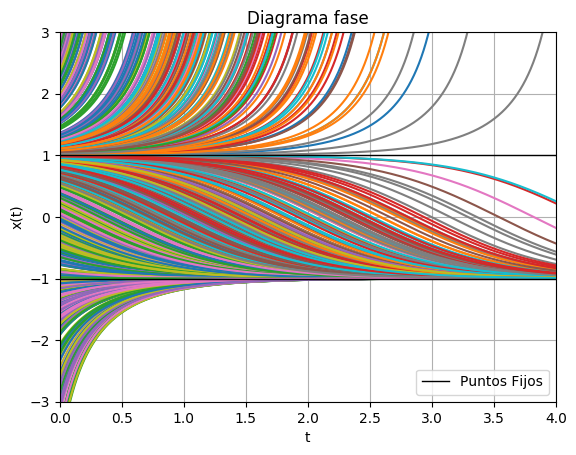

In [3]:
using PyPlot
for i in 1:n3
    
    x03_1=(rand(1)-rand(1))*4
    Dato3_RK_1_i=metodo_RK4h(f3,x03_1[1],ti3,tf3,h3)
    plot(Dato3_RK_1_i[1],map(x->x[1],Dato3_RK_1_i[2]))
    
    #Enfoque datos en 1
    x03_3=1+(rand(1)-2rand(1))*.25
    Dato3_RK_3_i=metodo_RK4h(f3,x03_3[1],ti3,tf3,h3)
    plot(Dato3_RK_3_i[1],map(x->x[1],Dato3_RK_3_i[2]))
end

plot([0,4],[-1,-1],linewidth=1.0,color="black",label="Puntos Fijos")
plot([0,4],[1,1],linewidth=1.0,color="black",)

gca()[:set_xlim]((0,4))
gca()[:set_ylim]((-3,3))

title("Diagrama fase")
legend()
xlabel("t")
ylabel("x(t)")
grid("on")
show()

----
__Ejercicio 4:__ También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

In [4]:
f4(x,t)=(x^2)
ti4=0
tf4=4
h4=.001
n4=500;

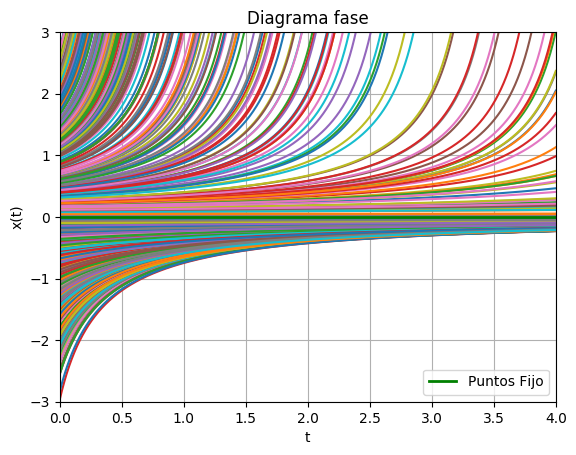

In [5]:
using PyPlot
for i in 1:n4
    x04_1=(rand(1)-rand(1))*3
    Dato4_RK_1_i=metodo_RK4h(f4,x04_1[1],ti4,tf4,h4)
    plot(Dato4_RK_1_i[1],map(x->x[1],Dato4_RK_1_i[2]))
end

plot([0,4],[0,0],linewidth=2.0,color="green",label="Puntos Fijo")

gca()[:set_xlim]((0,4))
gca()[:set_ylim]((-3,3))

title("Diagrama fase")
legend()
xlabel("t")
ylabel("x(t)")
grid("on")
show()

$x=0$ es un punto fijo, sin embargo se trata de un punto silla ya que para $t>0$: las soluciones negativas se atraen hacia este punto, en cambio, a las soluciones positivas el punto las repele. 

__Ejercicio 5:__ Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones:
$$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$
donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$
Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
* $a=c=1$, $b=d=0$
* $a=c=-1$, $b=d=0$
* $a=1$, $b=-2$, $c=d=0$
* $a=1$, $b=-0.5$, $c=d=0$
* $a=d=0$, $b=-c=1$
* $a=d=1$, $b=-c=1$
* $a=d=-1$, $b=-c=1$
* $a=d=-1$, $b=-c=-1$
* $a=b=1$, $b=4,c=-2$
* $a=b=d=-1$, $c=0$

In [6]:
function graph(F,Ti,Tf,H,N,L)
    for i in 1:N
        X1=((rand(1)-rand(1))*L)[1]
        Y1=((rand(1)-rand(1))*L)[1]
        X0=[X1;Y1]
        DATO_i=metodo_RK4h(F,X0,Ti,Tf,H)
        plot(map(x->x[1],DATO_i[2]),map(x->x[2],DATO_i[2]))
    end
    gca()[:set_xlim]((-L,L))
    gca()[:set_ylim]((-L,L))

    title("Posición")
    legend()
    xlabel("X(t)")
    ylabel("Y(t)")
    grid("on")
    return show()
end;

In [7]:
Ti=0
Tf=4
H=.001
N=1000
L=100;

* $a=c=1$, $b=d=0$

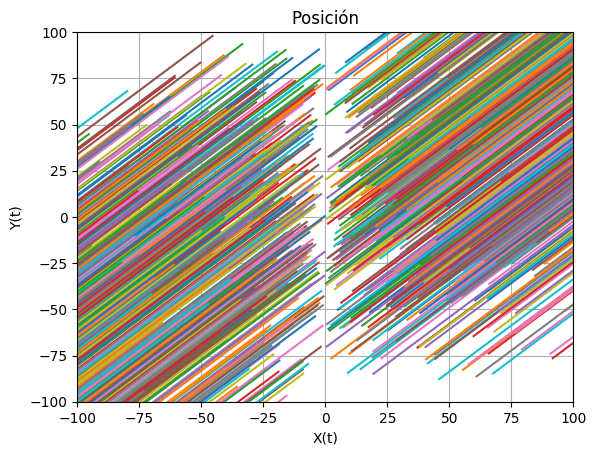

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [8]:
#Matriz
a=c=2
b=d=0
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

In [9]:
eig(A)

([0.0,2.0],
[0.0 0.707107; 1.0 0.707107])

* $a=c=-1$, $b=d=0$

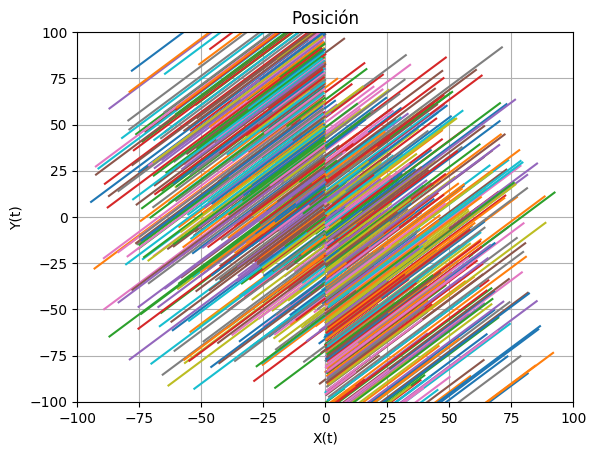

In [10]:
#Matriz
a=c=-1
b=d=0
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

In [11]:
eig(A)

([0.0,-1.0],
[0.0 0.707107; 1.0 0.707107])


* $a=1$, $b=-2$, $c=d=0$


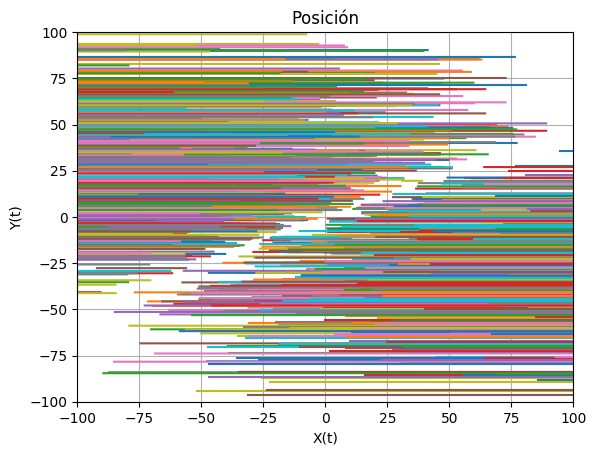

In [12]:
#Matriz
a=1
b=-2
c=d=0
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

In [13]:
eig(A)

([1.0,0.0],
[1.0 0.894427; 0.0 0.447214])

* $a=1$, $b=-0.5$, $c=d=0$

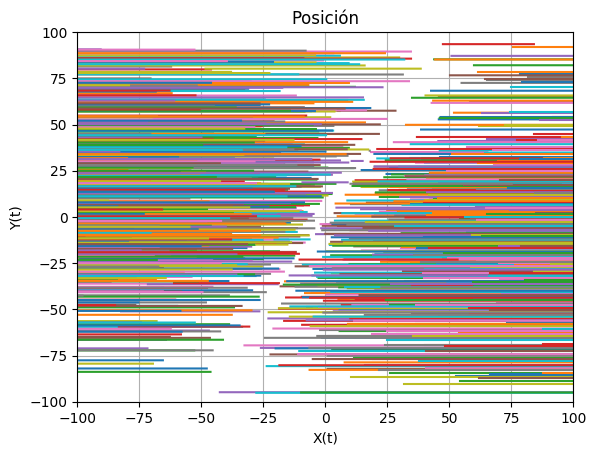

In [14]:
#Matriz
a=1
b=-.5
c=d=0
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

In [15]:
eig(A)

([1.0,0.0],
[1.0 0.447214; 0.0 0.894427])

* $a=d=0$, $b=-c=1$

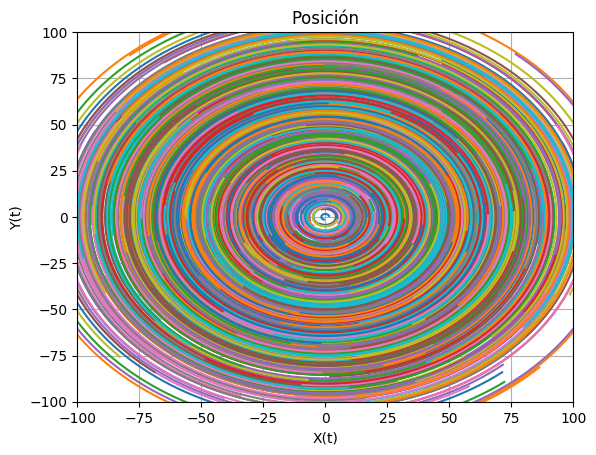

In [16]:
#Matriz
a=d=0
b=1
c=-1
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

In [17]:
eig(A)

(Complex{Float64}[0.0+1.0im,0.0-1.0im],
Complex{Float64}[0.707107+0.0im 0.707107-0.0im; 0.0+0.707107im 0.0-0.707107im])

* $a=d=1$, $b=-c=1$


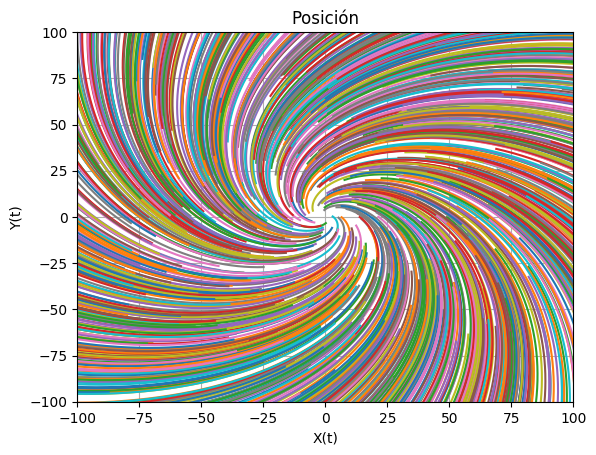

In [18]:
#Matriz
a=d=1
b=1
c=-b
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

In [19]:
eig(A)

(Complex{Float64}[1.0+1.0im,1.0-1.0im],
Complex{Float64}[0.707107+0.0im 0.707107-0.0im; 0.0+0.707107im 0.0-0.707107im])

* $a=d=-1$, $b=-c=1$


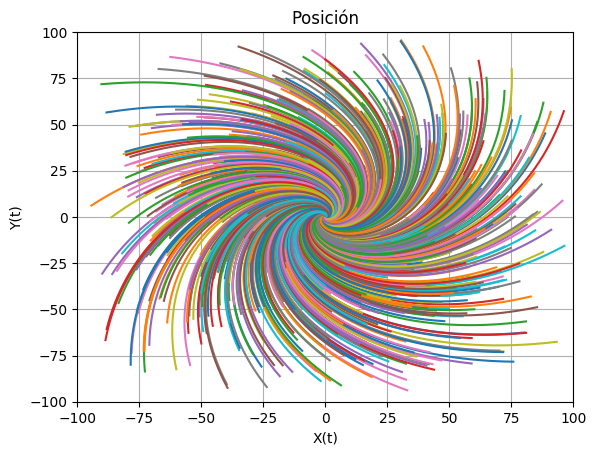

In [20]:
#Matriz
a=d=-1
b=1
c=-b
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

In [21]:
eig(A)

(Complex{Float64}[-1.0+1.0im,-1.0-1.0im],
Complex{Float64}[0.707107+0.0im 0.707107-0.0im; 0.0+0.707107im 0.0-0.707107im])

* $a=d=-1$, $b=-c=-1$


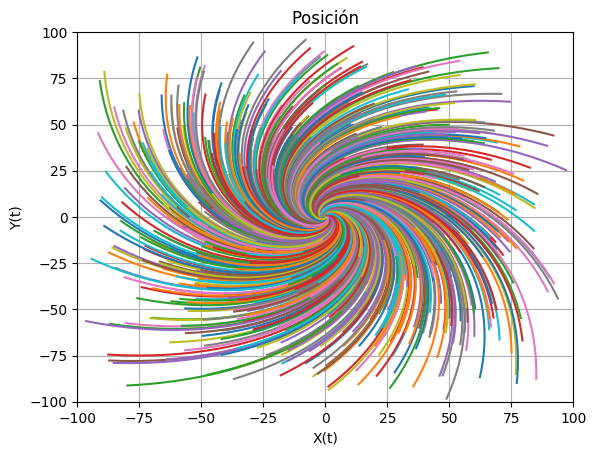

In [22]:
#Matriz
a=d=-1
b=-1
c=-b
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

In [23]:
eig(A)

(Complex{Float64}[-1.0+1.0im,-1.0-1.0im],
Complex{Float64}[0.707107+0.0im 0.707107-0.0im; 0.0-0.707107im 0.0+0.707107im])

* $a=b=1$, $b=4$ lo cambie por $\rightarrow d=4,c=-2$

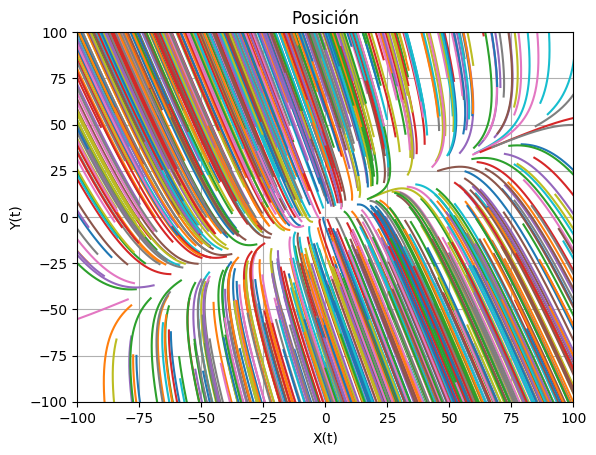

In [24]:
#Matriz
a=b=1
b=-1
d=4
c=-2
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

In [25]:
eig(A)

([0.438447,4.56155],
[-0.871928 0.270323; -0.489634 -0.96277])

* $a=b=d=-1$, $c=0$

In [ ]:
#Matriz
a=b=d=-1
c=0
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

In [27]:
eig(A)

([-1.0,-1.0],
[1.0 1.0; 0.0 2.22045e-16])

*****
```python
F F M G
```